<a href="https://colab.research.google.com/github/KazGet/Theory-of-random-processes/blob/main/Lab4_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import log, exp, pi
from scipy.stats import norm

np.random.seed(3)

S0 = 20
b = 4
a = 0
epsilon = 0.01
sigma = lambda x: (1.5 * x + 4) / 100
mu = lambda x: 0.05 * x
func = lambda t: mu(t) - (sigma(t) ** 2) / 2
t_list = np.linspace(a, b, num=9)
integral_trap = []
error_list = [0]
total_error = []
integral_monte = []
S = []
B_t = []
N_iteration = []
n_list = [0]
N_total = 50000  # Общее число итераций

# Rn(f) = max|f"(x)|*(b-a)h^2/12; Rn(f)<e; h=(b-a)/n; n=(b-a)/h
# Вторая производная
t = sp.Symbol('t')
f = mu(t) - 0.5 * (sigma(t) / 100) ** 2
f_second_derivative = sp.diff(f, t, 2)  # Вторая производная


# print("Вторая производная функции: ", f_second_derivative)


def n_optimal(b, a, deriviative):
    # Вычисляем такой n, чтобы ошибка удовлетворяла условию Rn<epsilon
    for i in range(1, 1000):
        h = (b - a) / i
        Rn = np.max(abs(deriviative)) * ((b - a) * h ** 2) / 12
        if Rn < epsilon:
            n = i
            h = (b - a) / n
            break
    # n_optimal: n%8=0
    for i in range(1, 1000):
        if n % 8 != 0:
            n += 1
        elif n == 8:
            n += 8
        else:
            break
    # print("Оптимальный n кратный 8: ", n)
    return n


# МЕТОД ТРАПЕЦИЙ
def trapz(t_list, N, f):
    for i, j in enumerate(t_list):
        if i == 0:  # Интеграл = 0, если a=b=0
            integral_trap.append(0) if f == func else B_t.append(20)
        else:
            n = int(N / 8 + 8 * (i - 1))
            h = (j - a) / n
            t_values = np.linspace(a, j, n + 1)
            Rn = 2.25 * ((j - 0) * h ** 2) / 12
            integral = (f(0) + f(j)) / 2 + (np.sum(f(t_values[1:n])))
            if f == func:
                integral_trap.append(h * integral + Rn)
                error_list.append(Rn)
                n_list.append(n)
            else:  # Для котировок облигаций
                B_t.append(S0 * np.exp(h * integral + Rn))
    return integral_trap if f != mu else B_t


# МЕТОД МОНТЕ-КАРЛО
def monte_carlo_integral(t_list, N_total):
    for i, j in enumerate(t_list):
        if i == 0:  # Интеграл = 0, если a=b=0
            N_iteration.append(0)
            error_list.append(0)
            integral_monte.append(0)
        else:
            N = int((i) / 8 * N_total)
            N_iteration.append(N)
            X_k = t_list[i] * np.random.uniform(0, 1, N)  # Равномерное распределение
            W_j = np.sqrt(t_list[i]) * np.random.normal(0, 1, N)  # Стохастическая часть
            integral = np.sum(sigma(X_k) * W_j) / N_total
            integral_monte.append(integral)
            error_mc = np.abs(integral) / np.sqrt(N)
            error_list.append(error_mc)
    return integral_monte


def stochastic_integration():
    n = n_optimal(b, a, f_second_derivative)
    t = trapz(t_list, n, func)
    B = trapz(t_list, n, mu)
    total_error = error_list.copy()
    error_list.clear()
    m = monte_carlo_integral(t_list, N_total)
    total_error = [i + j for i, j in zip(total_error, error_list)]
    for i in range(len(t_list)):
        S_combined = S0 * np.exp(t[i] + m[i])
        S.append(S_combined)
    return S, B, total_error


S, B, total_error = stochastic_integration()
print("Результаты вычислений:")
print(f"{'t (годы)':<10} {'Число разбиений n':<20} {'Число итераций N':<20} {'Ошибка':<15} {'S(t)':<15} {'B(t)'}")
print("-" * 100)
for i, t in enumerate(t_list):
    print(f"{t:<10.1f} {n_list[i]:<20} {N_iteration[i]:<20} {total_error[i]:<15.6f} {S[i]:<15.6f} {B_t[i]:.6f}")


Результаты вычислений:
t (годы)   Число разбиений n    Число итераций N     Ошибка          S(t)            B(t)
----------------------------------------------------------------------------------------------------
0.0        0                    0                    0.000000        20.000000       20.000000
0.5        2                    6250                 0.005860        20.232620       20.243660
1.0        10                   12500                0.001875        20.520658       20.544788
1.5        18                   18750                0.001954        21.158338       21.198605
2.0        26                   25000                0.002221        22.076272       22.152519
2.5        34                   31250                0.002535        23.334667       23.441703
3.0        42                   37500                0.002870        24.966043       25.118438
3.5        50                   43750                0.003217        27.044955       27.253935
4.0        58             

d1:  2.064876758573461
d2:  1.9696139641571726
Ct:  3.6020523479171622
E:  22.857142857142854

Дельта: 
0:  0.9996253270844645
1:  0.9954795733086393
2:  0.9805326686607049
3:  0.9638896195322836
4:  0.9571628218977288
5:  0.9675255937784467
6:  0.9880034756135908
7:  0.9996231779497144
8:  1




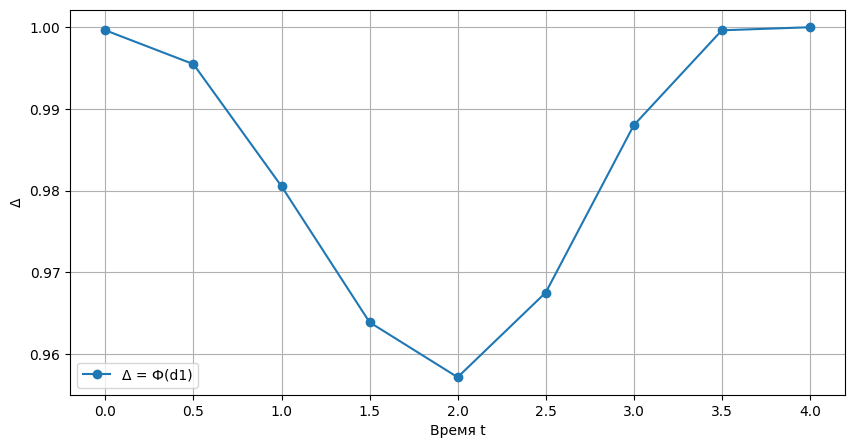


Тета большое: 
0:  0.0004931819157795404
1:  0.00601267860148421
2:  0.025968761325404474
3:  0.046364861839710884
4:  0.048759605472443
5:  0.025054021745639594
6:  -0.002277520632167615
7:  -0.0013818874190886718
8:  0


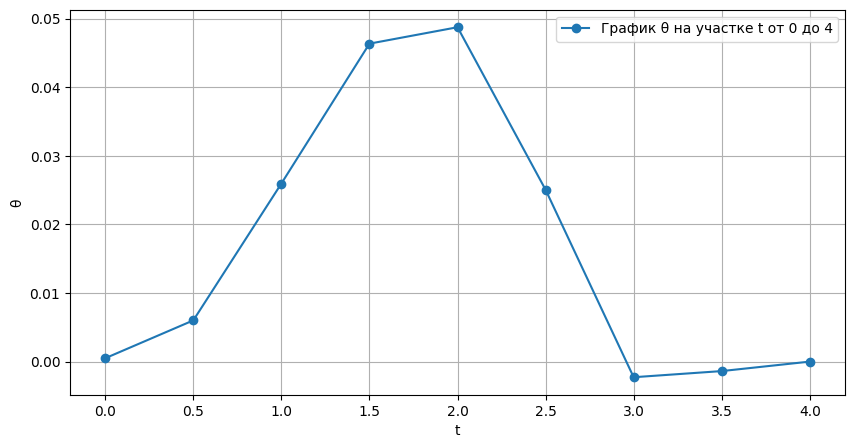


Данные: Финансовый портфель
0:  15.313949255953405
1:  16.01308343557839
2:  16.519123409943944
3:  17.006005150703196
4:  17.728543510027723
5:  18.88640316009913
6:  20.373448312181836
7:  21.73202022465131
8:  22.857142857142854


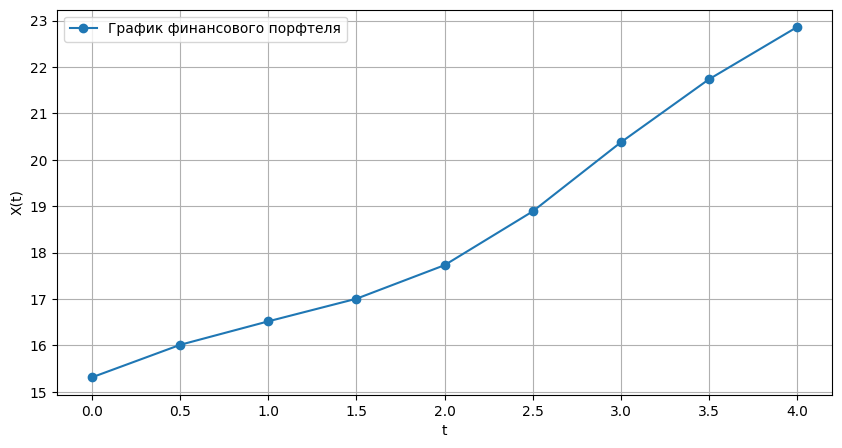

In [ ]:
E = 8 / 7 * 20
r = 0.1

sigma = lambda x: (1.5 * x + 4) / 100
mu = lambda x: 0.05 * x


T = 4
tao = 3
t = 1
# Для t=1 -> S2=[0,1]
S1 = S[2]
d1 = (log(S1 / E) + (r + 0.5 * sigma(t) ** 2) * tao) / ((tao ** 0.5) * sigma(t))
# d2 = (log(S1)-log(E)+(r-0.5*sigma(t)**2)*tao)/((tao**0.5)*sigma(t))
print("d1: ", d1)
d2 = d1 - sigma(t) * (tao ** 0.5)
print("d2: ", d2)

C_t = S1 * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
print("Ct: ", C_t)
print("E: ", E)

delta = []

def delta_calc(t_list, S, r, T):
    for i in range(len(t_list)):
        if (T-t_list[i])!=0:
            delta.append(norm.cdf((log(S[i] / E) + (r + 0.5 * sigma(t_list[i]) ** 2) * (T - t_list[i])) / (
                        ((T - t_list[i]) ** 0.5) * sigma(t_list[i]))))
        else:
            delta.append(1) if S[i]>E else delta.append(0)
    return delta


delta_c = delta_calc(t_list, S, r, T)
print("\nДельта: ")
for i, j in enumerate(delta_c):
    print(f"{i}:  {j}")
print('\n')

plt.figure(figsize=(10, 5))
plt.plot(t_list, delta_c, marker='o', linestyle='-', label="Δ = Ф(d1)")
plt.xlabel("Время t")
plt.ylabel("Δ")
plt.legend()
plt.grid()
plt.show()


def big_teta(t_list, S, r, T):
    teta = []
    for i in range(len(t_list)):
        tao = T - t_list[i]
        if tao!=0:
            d1 = (log(S[i] / E) + (r + 0.5 * sigma(t_list[i]) ** 2) * tao) / ((tao ** 0.5) * sigma(t_list[i]))
            d2 = d1 - (sigma(t_list[i]) * (tao ** 0.5))
            # temp=-sigma(t_list[i]) * S[i] * norm.pdf(d1) / (2 * ((2 * pi) ** 0.5) * (tao ** 0.5))
            # temp+=E * r * exp(-r * tao) * norm.cdf(-d2)
            # teta.append(temp)
            teta.append(- (sigma(t_list[i]) * S[i] / (2 * np.sqrt(tao))) * norm.pdf(d1) + r * E * np.exp(-r * tao) * norm.cdf(-d2))
        else:
            teta.append(0)
    return teta


teta_arr = big_teta(t_list, S, r, T)
print("\nТета большое: ")
for i, j in enumerate(teta_arr):
    print(f"{i}:  {j}")

plt.figure(figsize=(10, 5))
plt.plot(t_list, teta_arr, marker='o', linestyle='-', label="График θ на участке t от 0 до 4")
plt.xlabel("t")
plt.ylabel("θ")
plt.legend()
plt.grid()
plt.show()
def calcX_t(t_list):
    X=[]
    for i in range(len(t_list)):
        tao = T - t_list[i]
        if tao!=0:
            delta = norm.cdf((log(S[i] / E) + (r + 0.5 * sigma(t_list[i]) ** 2) * tao) / (
                        (tao ** 0.5) * sigma(t_list[i])))
            d1 = (log(S[i] / E) + (r + 0.5 * sigma(t_list[i]) ** 2) * tao) / ((tao ** 0.5) * sigma(t_list[i]))
            d2 = d1 - (sigma(t_list[i]) * (tao ** 0.5))
            Ct = S[i] * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
            X.append(-Ct+S[i]*delta)
        else:
            delta = 1
            F_d1 = 1 if log(S[i])>log(E) else 0
            F_d2 = F_d1
            Ct = S[i] * F_d1 - E * exp(-r * tao) * F_d2
            X.append(-Ct + S[i] * delta)
    return X

financial_portfolio=calcX_t(t_list)
print("\nДанные: Финансовый портфель")
for i, j in enumerate(financial_portfolio):
    print(f"{i}:  {j}")

plt.figure(figsize=(10, 5))
plt.plot(t_list, financial_portfolio, marker='o', linestyle='-', label="График финансового порфтеля")
plt.xlabel("t")
plt.ylabel("X(t)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
prices = [50.0, 49.67, 49.63, 49.74, 50.22, 48.36, 48.74, 50.08, 49.63, 48.39, 48.19, 48.95, 48.57, 48.34, 49.02, 48.85, 49.45, 49.46, 48.48, 47.87, 46.51, 48.55, 47.96, 48.26, 47.74, 48.8, 48.31, 49.16, 48.18, 47.65, 46.19, 46.17, 46.05, 46.28, 44.47, 44.02, 43.0, 42.59, 43.23, 43.52, 45.2, 46.11, 46.24, 46.5, 45.64, 46.9, 46.43, 46.67, 46.91, 47.64, 48.21]
# Расчёт относительной доходности
returns = np.diff(prices) / prices[:-1]

# Несмещённая дисперсия и годовая волатильность
sample_variance = np.var(returns, ddof=1)
volatility_annual = np.sqrt(sample_variance * len(prices))

# Вывод
print(f"Несмещённая дисперсия: {sample_variance:.8f}")
print(f"Годовая реализованная волатильность: {volatility_annual:.6f}")

Несмещённая дисперсия: 0.00032277
Годовая реализованная волатильность: 0.128301


               Дельта:  Г:        Vega:
tao = 0.98:   0.78317; 0.04654;  14.43787
tao = 0.96:   0.77859; 0.04763;  14.45104
tao = 0.94:   0.78111; 0.04772;  14.23751
tao = 0.92:   0.80089; 0.04518;  13.44953
tao = 0.9:   0.70065; 0.05901;  15.9358
tao = 0.88:   0.7188; 0.0575;  15.42308
tao = 0.86:   0.7869; 0.04878;  13.49988
tao = 0.84:   0.76114; 0.05313;  14.10384
tao = 0.82:   0.68516; 0.06317;  15.56284
tao = 0.8:   0.66757; 0.06568;  15.65527
tao = 0.78:   0.71148; 0.06157;  14.76275
tao = 0.76:   0.68295; 0.06557;  15.08306
tao = 0.74:   0.66266; 0.06847;  15.19057
tao = 0.72:   0.70332; 0.06482;  14.3892
tao = 0.7:   0.68758; 0.06751;  14.46761
tao = 0.68:   0.72277; 0.06403;  13.66048
tao = 0.66:   0.71943; 0.06536;  13.53945
tao = 0.64:   0.64583; 0.07475;  14.427
tao = 0.62:   0.59224; 0.08028;  14.63357
tao = 0.6:   0.47025; 0.08607;  14.33252
tao = 0.58:   0.63355; 0.07934;  13.91633
tao = 0.56:   0.57825; 0.08497;  14.04175
tao = 0.54:   0.59647; 0.0851;  13.73232
tao = 

<Figure size 640x480 with 0 Axes>

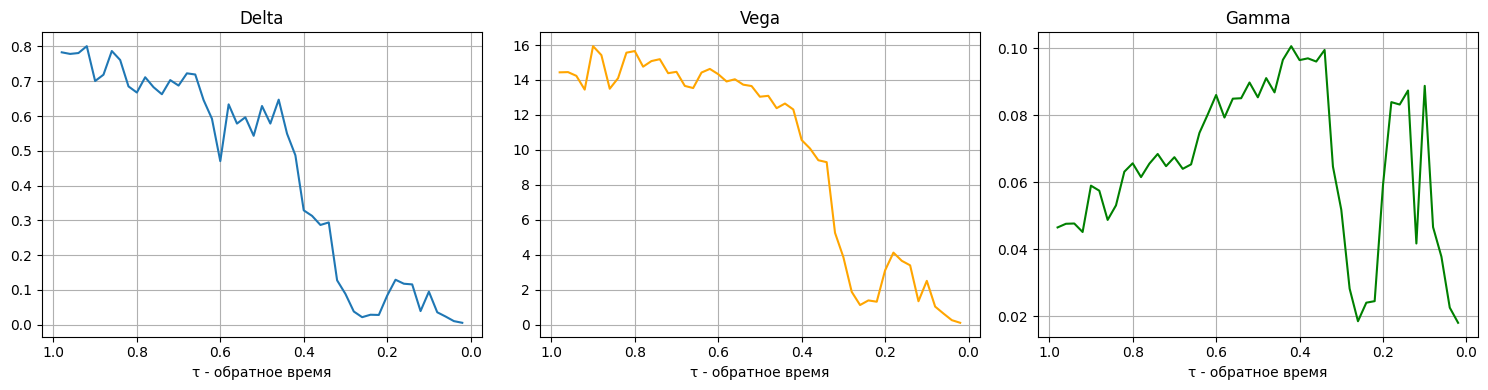

In [ ]:
E=50
tao_list, delta_tao, delta_derivative, Vega = [], [], [], []

for i in range(1, 50):
  tao_list.append((50-i)/50)

new_prices=prices[1:-1]

for i in range(len(tao_list)):
    d1=(log(new_prices[i] / E) + (r + 0.5 * volatility_annual ** 2) * tao_list[i]) / ((tao_list[i] ** 0.5) * volatility_annual)
    delta_tao.append(norm.cdf(d1))
    delta_derivative.append(norm.pdf(d1)/(new_prices[i]*volatility_annual*tao_list[i]**0.5))
    Vega.append(new_prices[i]*tao_list[i]**0.5*norm.pdf(d1))

print(f"               Дельта:  Г:        Vega:")
for i in range(len(tao_list)):
    print(f"tao = {tao_list[i]}:   {round(delta_tao[i], 5)}; {round(delta_derivative[i], 5)};  {round(Vega[i], 5)}")


plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(tao_list, delta_tao, label='Delta')
plt.gca().invert_xaxis()
plt.xlabel('τ - обратное время')
plt.title('Delta')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(tao_list, Vega, label='Vega', color='orange')
plt.gca().invert_xaxis()
plt.xlabel('τ - обратное время')
plt.title('Vega')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(tao_list, delta_derivative, label='Gamma', color='green')
plt.gca().invert_xaxis()
plt.xlabel('τ - обратное время')
plt.title('Gamma')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#Для значения Гамма при tao->0
S = 48.21 #Последняя котировка
tao = 0.0000001 #Что-то около нуля
d1=(log(S / E) + (r + 0.5 * volatility_annual ** 2) * tao) / ((tao** 0.5) * volatility_annual)
print(norm.pdf(d1)/(S*volatility_annual*tao**0.5))


0.0
